# Decision Tree - Weather DataSet



OBJETIVO:  Mostrar a árvore gerada, a matriz de confusão, as métricas do modelo, e as regras geradas com as respectivas coberturas. 

In [1]:
# Importando bibliotecas
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

import pydot
import pydotplus

In [2]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/weather.nominal.csv"
data_treino = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [4]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data_treino['play']
data_treino.drop(["play"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data_treino, columns=['outlook', 'temperature', 'humidity'])

In [5]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
treinamento_dados['windy'] = labelencoder.fit_transform(treinamento_dados['windy'])

In [6]:
# Separar dados de treinamento e de testes
from sklearn.model_selection import train_test_split
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.20, random_state=0)

In [ ]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_weather = DecisionTreeClassifier(criterion="entropy")
tree_weather.fit(dataset_treino, dataset_treino_class)

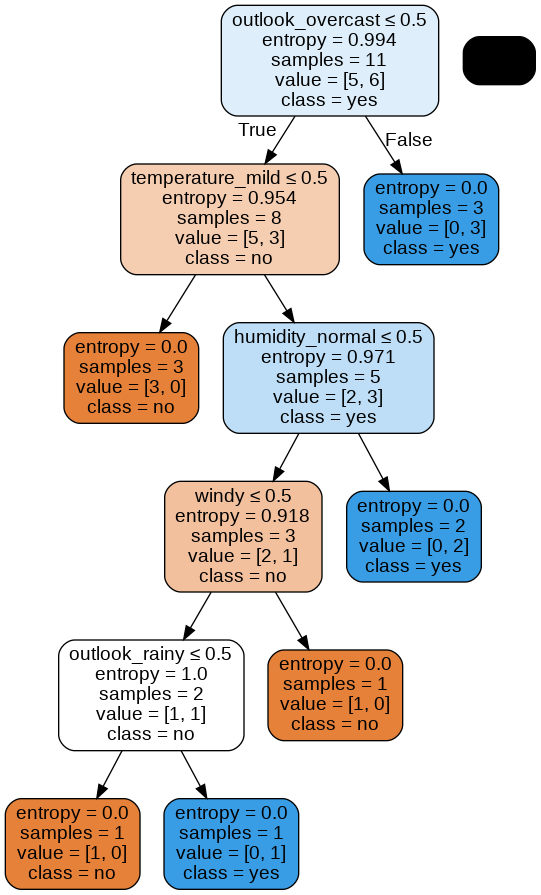

In [10]:
dot_data = tree.export_graphviz(tree_weather, out_file=None,
                                feature_names=dataset_treino.columns.values,
                                class_names=treinamento_classification.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tree_weather.png')

from IPython.display import Image
Image(filename='tree_weather.png')

In [11]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

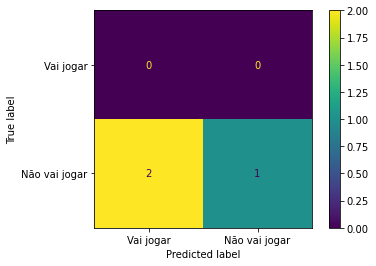

In [12]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_weather.predict(dataset_teste))
labels = ["Vai jogar", "Não vai jogar"]
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
cmd.plot(values_format="d")
plt.show()

In [13]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [14]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_weather.predict(dataset_teste)))
print('\n')
print(classification_report(dataset_teste_class, tree_weather.predict(dataset_teste), target_names=labels))
print('\n')
tn, fp, fn, tp = confusion_matrix(dataset_teste_class, tree_weather.predict(dataset_teste)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

Accuracy score =  0.3333333333333333


               precision    recall  f1-score   support

    Vai jogar       0.00      0.00      0.00         0
Não vai jogar       1.00      0.33      0.50         3

     accuracy                           0.33         3
    macro avg       0.50      0.17      0.25         3
 weighted avg       1.00      0.33      0.50         3



True negative rate: nan
False positive rate: nan
False negative rate: 0.6666666666666666
True positive rate: 0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid val